<a href="https://colab.research.google.com/github/rodrigopbbr/aprendizado_de_maquina/blob/main/dt_categorico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# biblioteca para manipulação de dados
import pandas as pd
# biblioteca para operações matemáticas
import numpy as np
# biblioteca para operações aleatórias
import random
# biblioteca para separação dos dados em treinamento e teste
from sklearn.model_selection import train_test_split
# biblioteca para carregar arquivos (e.g. csv)
from google.colab import files
# biblioteca para executar o DT
from sklearn.tree import DecisionTreeClassifier
# biblioteca para rodar a validação cruzada
from sklearn.model_selection import cross_val_score
#biblioteca de gráfico
import matplotlib.pyplot as plt
# bilbioteca para plotar a árvore
from sklearn.tree import plot_tree

In [ ]:
### você pode usar o código abaixo para carregar qualquer conjunto de dados
### para testar, não esqueça de descomentar a linha abaixo (remover o #)
### para praticar, faça upload do conjunto de dados "iris.csv" 
###    compartilhado pelo professor
files.upload()

Saving jogar-tenis-2.csv to jogar-tenis-2.csv


{'jogar-tenis-2.csv': b'Tempo;Temperatura;Umidade;Vento;Jogar\nEnsolarado;Quente;Alta;Fraco;N\xc3\xa3o\nEnsolarado;Quente;Alta;Forte;N\xc3\xa3o\nNublado;Quente;Alta;Fraco;Sim\nChuvoso;Intermedi\xc3\xa1ria;Alta;Fraco;Sim\nChuvoso;Fria;Normal;Fraco;Sim\nChuvoso;Fria;Normal;Forte;N\xc3\xa3o\nNublado;Fria;Normal;Forte;Sim\nEnsolarado;Intermedi\xc3\xa1ria;Alta;Fraco;N\xc3\xa3o\nEnsolarado;Fria;Normal;Fraco;Sim\nChuvoso;Intermedi\xc3\xa1ria;Normal;Fraco;Sim\nEnsolarado;Intermedi\xc3\xa1ria;Normal;Forte;Sim\nNublado;Intermedi\xc3\xa1ria;Alta;Forte;Sim\nNublado;Quente;Normal;Fraco;Sim\nChuvoso;Intermedi\xc3\xa1ria;Alta;Forte;N\xc3\xa3o\n'}

In [ ]:
# carregando o conjunto de dados iris (https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris)
dataset = pd.read_csv('jogar-tenis-2.csv', sep=';')
#dataset = pd.read_csv('biodiversity-br.csv')
# visualizando parte dos dados
dataset

,Tempo,Temperatura,Umidade,Vento,Jogar
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Intermediária,Alta,Fraco,Sim
4,Chuvoso,Fria,Normal,Fraco,Sim
5,Chuvoso,Fria,Normal,Forte,Não
6,Nublado,Fria,Normal,Forte,Sim
7,Ensolarado,Intermediária,Alta,Fraco,Não
8,Ensolarado,Fria,Normal,Fraco,Sim
9,Chuvoso,Intermediária,Normal,Fraco,Sim


In [ ]:
dataset = pd.get_dummies(dataset, columns=['Tempo', 'Temperatura', 'Umidade', 'Vento'])
dataset

,Jogar,Tempo_Chuvoso,Tempo_Ensolarado,Tempo_Nublado,Temperatura_Fria,Temperatura_Intermediária,Temperatura_Quente,Umidade_Alta,Umidade_Normal,Vento_Forte,Vento_Fraco
0,Não,0,1,0,0,0,1,1,0,0,1
1,Não,0,1,0,0,0,1,1,0,1,0
2,Sim,0,0,1,0,0,1,1,0,0,1
3,Sim,1,0,0,0,1,0,1,0,0,1
4,Sim,1,0,0,1,0,0,0,1,0,1
5,Não,1,0,0,1,0,0,0,1,1,0
6,Sim,0,0,1,1,0,0,0,1,1,0
7,Não,0,1,0,0,1,0,1,0,0,1
8,Sim,0,1,0,1,0,0,0,1,0,1
9,Sim,1,0,0,0,1,0,0,1,0,1


In [ ]:
# separando o rótulo Species (Aprendizado de Máquina Supervisionado) dos demais atributos: y
y = dataset['Jogar']
dataset = dataset.drop(['Jogar'], axis = 1)

In [ ]:
# dividindo o conjunto de dados em treinamento e teste
# test_size informa qual o percentual de dados que vamos usar no teste
# neste exemplo estamos usando 10% (0.1)
X_train,X_test,y_train,y_test = train_test_split(dataset, y, test_size=0.2)

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy')

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# gerando a matriz de confusão
# um resultado perfeito acontece quando todos os valores estão na linha diagonal
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Sim,All
True,,
Não,1,1
Sim,2,2
All,3,3


In [ ]:
# acurácia
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(f"Precisão: {precision_score(y_test, y_pred, average='macro')}")
print(f"Revocação: {recall_score(y_test, y_pred, average='macro')}")
print(f"f1-measure: {f1_score(y_test, y_pred, average='macro')}")

Acurácia: 0.6666666666666666
Precisão: 0.3333333333333333
Revocação: 0.5
f1-measure: 0.4


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(133.92000000000002, 293.54400000000004, 'X[6] <= 0.5\nentropy = 0.918\nsamples = 12\nvalue = [4, 8]'),
 Text(66.96000000000001, 228.312, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(200.88000000000002, 228.312, 'X[1] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(133.92000000000002, 163.08000000000004, 'X[0] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 97.84800000000001, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 97.84800000000001, 'X[9] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 32.61600000000004, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 32.61600000000004, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 163.08000000000004, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]')]

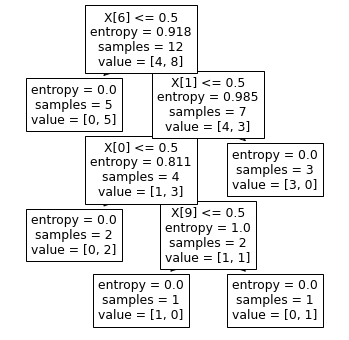

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_tree(clf, ax=ax)
